In [1]:
##110 Parkland Plaza

In [2]:
import pandas as pd
gelman_data = pd.read_excel("../../result(new)/joined_well_data.xlsx")
gelman_data.head(5)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_datum,utm_zone,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon
0,0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,False,13274717.9,...,22,12,0,0,1,0,0,NaN,42.269732,-83.807344
1,1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,False,13274221.6,...,22,12,0,0,1,0,0,NaN,42.269808,-83.809177
2,2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,False,13274722.1,...,22,12,0,0,1,0,0,NaN,42.269390,-83.807331
3,3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411
4,4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411


In [3]:
well_data = gelman_data
well_data.loc[:, 'y']= pd.to_numeric(well_data['Value'])
well_data.loc[:, 'ds']= pd.to_datetime(well_data['SampleDate'])
well_data.head(5)
well_data = well_data.loc[well_data['Bore'] == '110 Parkland Plaza']

In [4]:
import datetime as dt
start_date = dt.date(1980, 1, 1)
def cal_count(row):
    delta =row['ds'].date() - start_date
    return delta.days
well_data['DaysNum'] = well_data.apply(cal_count, axis=1)
well_data.head(5)

<ipython-input-4-a81e42bbbc5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_data['DaysNum'] = well_data.apply(cal_count, axis=1)


,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon,y,ds,DaysNum
17,17,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-08-22,17.0,NaN,False,13272829.0,...,0,1,0,0,NaN,42.283188,-83.814204,17.0,1986-08-22,2425
18,18,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-09-19,17.0,NaN,False,13272829.0,...,0,1,0,0,NaN,42.283188,-83.814204,17.0,1986-09-19,2453
19,19,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1986-10-10,12.0,NaN,False,13272829.0,...,0,1,0,0,NaN,42.283188,-83.814204,12.0,1986-10-10,2474
20,20,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1987-11-09,7.0,NaN,False,13272829.0,...,0,1,0,0,NaN,42.283188,-83.814204,7.0,1987-11-09,2869
21,21,110 Parkland Plaza,1-4 Dioxane,80.2,91.0,1988-04-18,13.0,NaN,False,13272829.0,...,0,1,0,0,NaN,42.283188,-83.814204,13.0,1988-04-18,3030


In [5]:
features = well_data[["Depth1", "Depth2", "Easting", "Northing","DaysNum" ,"y"]]
features.head(5)

,Depth1,Depth2,Easting,Northing,DaysNum,y
17,80.2,91.0,13272829.0,285907.0,2425,17.0
18,80.2,91.0,13272829.0,285907.0,2453,17.0
19,80.2,91.0,13272829.0,285907.0,2474,12.0
20,80.2,91.0,13272829.0,285907.0,2869,7.0
21,80.2,91.0,13272829.0,285907.0,3030,13.0


In [6]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['y'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('y', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array

In [7]:
features = np.array(features)
features[:5]

array([[8.0200000e+01, 9.1000000e+01, 1.3272829e+07, 2.8590700e+05,
        2.4250000e+03],
       [8.0200000e+01, 9.1000000e+01, 1.3272829e+07, 2.8590700e+05,
        2.4530000e+03],
       [8.0200000e+01, 9.1000000e+01, 1.3272829e+07, 2.8590700e+05,
        2.4740000e+03],
       [8.0200000e+01, 9.1000000e+01, 1.3272829e+07, 2.8590700e+05,
        2.8690000e+03],
       [8.0200000e+01, 9.1000000e+01, 1.3272829e+07, 2.8590700e+05,
        3.0300000e+03]])

In [8]:
labels[:5]

array([17., 17., 12.,  7., 13.])

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels \
    = train_test_split(features, labels,
                       test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (39, 5)
Training Labels Shape: (39,)
Testing Features Shape: (14, 5)
Testing Labels Shape: (14,)


In [11]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('DaysNum')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  7496.47


In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.29 degrees.


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.89 %.


In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('./tree.dot')
# Write graph to a png file
graph.write_fig('tree.png')

![tree](./tree.png)

In [31]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

![small_tree](./small_tree.png)

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DaysNum              Importance: 1.0
Variable: Depth1               Importance: 0.0
Variable: Depth2               Importance: 0.0
Variable: Easting              Importance: 0.0
Variable: Northing             Importance: 0.0


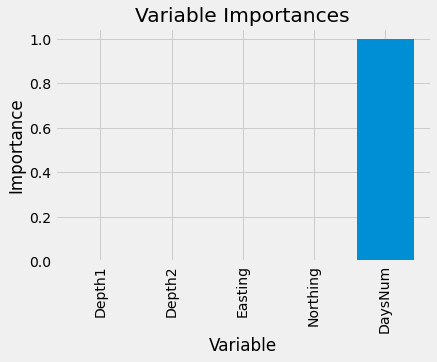

In [28]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

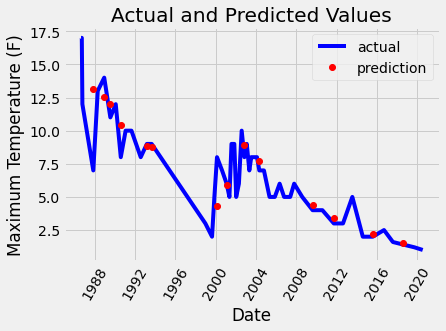

In [35]:
# Dataframe with true values and dates
day_nums = features[:, feature_list.index('DaysNum')]
dates = [start_date + dt.timedelta(days=i) for i in day_nums]
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

test_day_nums = test_features[:, feature_list.index('DaysNum')]
# Convert to datetime objects
test_dates = [start_date + dt.timedelta(days=i) for i in test_day_nums]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');